In [69]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from statistics import mode
import pandas as pd
import numpy as np
import time


# carregar datasets

iris = load_iris()

icmr_data = pd.read_csv("archive/data.csv")
icmr_labels = pd.read_csv("archive/labels.csv")

del icmr_data[icmr_data.columns[0]]

# preparar datasets

# iris
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris.data, iris.target, test_size=0.2)

pca = PCA(n_components=2)
pca_components_iris = pca.fit_transform(iris.data)
X_train_pca_iris, X_test_pca_iris, y_train_pca_iris, y_test_pca_iris = train_test_split(pca_components_iris, iris.target,
                       train_size=0.7,
                       test_size=0.3,
                       random_state=9999)

#icmr
X_train_icmr, X_test_icmr, y_train_icmr, y_test_icmr = train_test_split(np.array(icmr_data), icmr_labels["Class"], test_size=0.2)

pca = PCA(n_components=2)
pca_components_icmr = pca.fit_transform(np.array(icmr_data))
X_train_pca_icmr, X_test_pca_icmr, y_train_pca_icmr, y_test_pca_icmr = train_test_split(pca_components_icmr, icmr_labels["Class"],
                       train_size=0.7,
                       test_size=0.3,
                       random_state=9999)

### KNN

In [70]:
class KNN:
    def __init__(self, k=3):
        self.y = None
        self.x = None
        self.k = k

    def fit(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)

    def predict(self, X, timer = False):
        if timer:
            t = time.perf_counter()
        y_pred = []
        for i in range(len(X)):
            distances = self.getSortedDistances(X[i])[:self.k]
            indexes = []
            for d in distances:
                indexes.append(d[1])
            y_pred.append(self.y[mode(indexes)])
        if timer:
            return np.array(y_pred), time.perf_counter() - t
        return np.array(y_pred)

    def getSortedDistances(self, x1):
        distances = []
        for i in range(len(self.x)):
            distance = np.sqrt(pow(x1[0] - self.x[i][0], 2) + pow(x1[1] - self.x[i][1], 2))
            distances.append((distance, i))
        distances.sort()
        return distances

### TESTES KNN

TESTE 1: DATASET IRIS
IMPLEMENTACAO PROPRIA KNN:
TEMPO PARA RODAR: 0.01804414300022472 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.57      0.44      0.50         9
           2       0.64      0.75      0.69        12

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30

COM PCA:
TEMPO PARA RODAR: 0.014132758999039652 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45




IMPLEMENTACAO SCIKITLEARN KNN:
TEMPO PARA RODAR: 0.005420020999736153 
               precision 

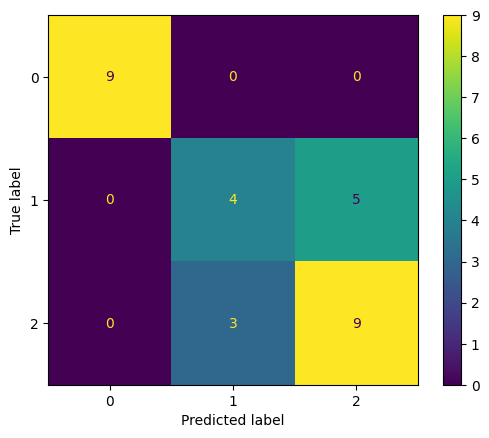

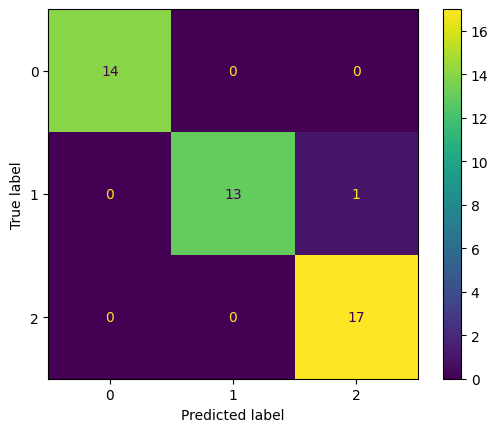

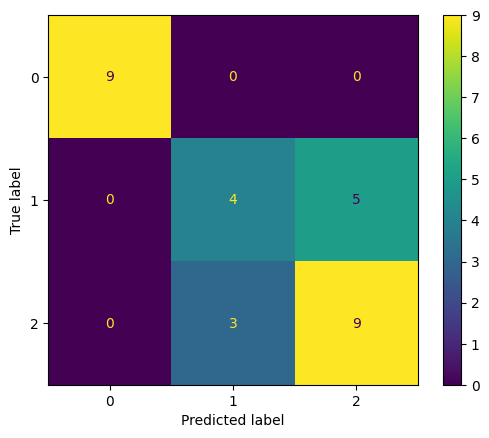

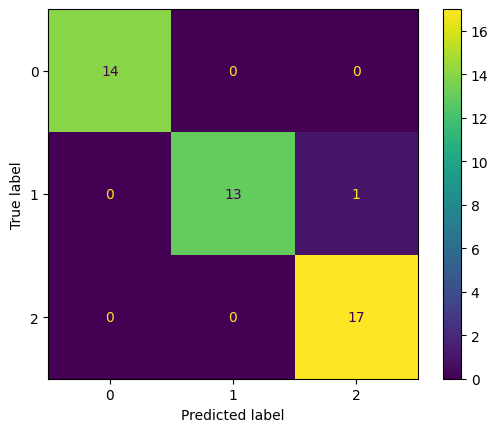

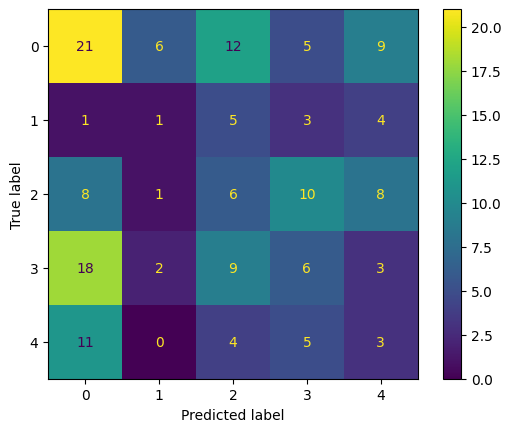

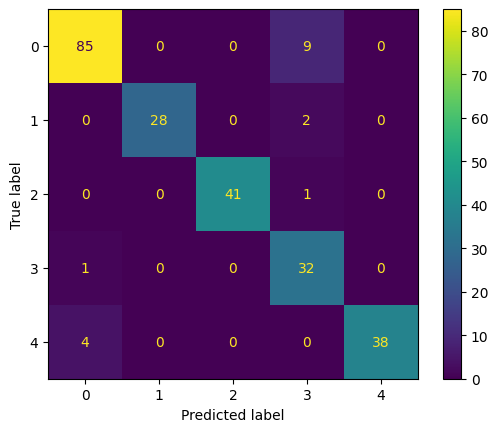

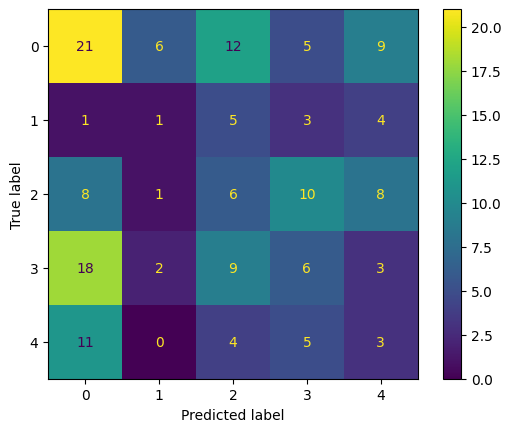

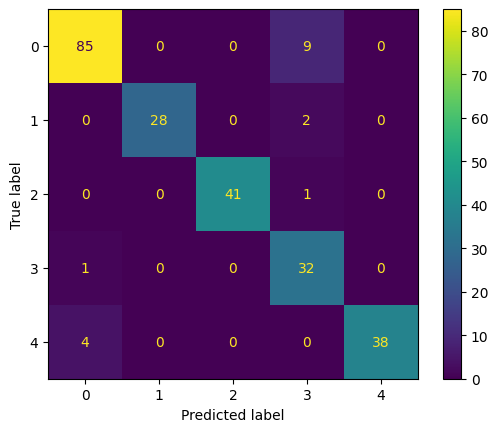

In [71]:
n_neighbors = 10

print("TESTE 1: DATASET IRIS")

knn = KNN(k=n_neighbors)
knn.fit(X_train_iris, y_train_iris)
result1, t1 = knn.predict(X_test_iris, timer=True)

knn = KNN(k=n_neighbors)
knn.fit(X_train_pca_iris, y_train_pca_iris)
result2, t2 = knn.predict(X_test_pca_iris, timer=True)

print("IMPLEMENTACAO PROPRIA KNN:\nTEMPO PARA RODAR:", t1, "\n",  classification_report(y_test_iris, result1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_iris, result1))
disp.plot()
print("COM PCA:\nTEMPO PARA RODAR:", t2, "\n", classification_report(y_test_pca_iris, result2))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_pca_iris, result2))
disp.plot()
print("\n\n")

scikitlearnKnn = KNN(k=n_neighbors)
scikitlearnKnn.fit(X_train_iris, y_train_iris)
t1 = time.perf_counter()
result1 = scikitlearnKnn.predict(X_test_iris)
t1 = time.perf_counter() - t1

scikitlearnKnn = KNN(k=n_neighbors)
scikitlearnKnn.fit(X_train_pca_iris, y_train_pca_iris)
t2 = time.perf_counter()
result2 = scikitlearnKnn.predict(X_test_pca_iris)
t2 = time.perf_counter() - t2

print("IMPLEMENTACAO SCIKITLEARN KNN:\nTEMPO PARA RODAR:", t1, "\n",  classification_report(y_test_iris, result1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_iris, result1))
disp.plot()
print("COM PCA:\nTEMPO PARA RODAR:", t2, "\n",  classification_report(y_test_pca_iris, result2))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_pca_iris, result2))
disp.plot()

print("TESTE 2: DATASET ICMR")

knn = KNN(k=n_neighbors)
knn.fit(X_train_icmr, y_train_icmr)
result1, t1 = knn.predict(X_test_icmr, timer=True)

knn = KNN(k=n_neighbors)
knn.fit(X_train_pca_icmr, y_train_pca_icmr)
result2, t2 = knn.predict(X_test_pca_icmr, timer=True)

print("IMPLEMENTACAO PROPRIA KNN:\nTEMPO PARA RODAR:", t1, "\n",  classification_report(y_test_icmr, result1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_icmr, result1))
disp.plot()
print("COM PCA:\nTEMPO PARA RODAR:", t2, "\n",  classification_report(y_test_pca_icmr, result2))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_pca_icmr, result2))
disp.plot()
print("\n\n")

scikitlearnKnn = KNN(k=n_neighbors)
scikitlearnKnn.fit(X_train_icmr, y_train_icmr)
t1 = time.perf_counter()
result1 = scikitlearnKnn.predict(X_test_icmr)
t1 = time.perf_counter() - t1

scikitlearnKnn = KNN(k=n_neighbors)
scikitlearnKnn.fit(X_train_pca_icmr, y_train_pca_icmr)
t2 = time.perf_counter()
result2 = scikitlearnKnn.predict(X_test_pca_icmr)
t2 = time.perf_counter() - t2

print("IMPLEMENTACAO SCIKITLEARN KNN:\nTEMPO PARA RODAR:", t1, "\n",  classification_report(y_test_icmr, result1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_icmr, result1))
disp.plot()
print("COM PCA:\nTEMPO PARA RODAR:", t2, "\n",  classification_report(y_test_pca_icmr, result2))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_pca_icmr, result2))
disp.plot()


Na propria implementacao do Knn, sem usar o pca ele fica muito ruim comparado a implementacao do scikit learn, isto é porque ele leva apenas em consideracao apenas os dois primeiros valores das informacoes para usar como coordenada e medir a distancia, a implementacao do scikit learn lida com este problema de uma maneira bem mais eficiente, mas quando se faz o PCA para diminuir o numero de features, a propria implementacao consegue chegar mais proximo a precisao do scikit learn

### NAIVE BAYES

In [72]:
class NaiveBayes:
    def __init__(self):
        self.mean = None
        self.priors = None
        self.var = None
        self.n_classes = None
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)
        self.mean = np.zeros((self.n_classes, X.shape[1]))
        self.var = np.zeros((self.n_classes, X.shape[1]))
        self.priors = np.zeros(self.n_classes)
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i, :] = np.mean(X_c)
            self.var[i, :] = np.var(X_c)
            self.priors[i] = X_c.shape[0] / float(X.shape[0])

    def predict(self, X, timer = False):
        if timer:
            t = time.perf_counter()
        likelihood = np.zeros((X.shape[0], self.n_classes))
        for i, c in enumerate(self.classes):
            prior = np.log(self.priors[i])
            likelihood[:, i] = np.sum(np.log(self._pdf(X, self.mean[i, :], self.var[i, :])), axis=1) + prior
        if timer:
            return self.classes[np.argmax(likelihood, axis=1)], time.perf_counter() - t
        return self.classes[np.argmax(likelihood, axis=1)]

    def _pdf(self, X, mean, var):
        eps = 1e-4
        var = var + eps
        return (1.0 / np.sqrt(2 * np.pi * var)) * np.exp(-(X - mean) ** 2 / (2 * var))

### TESTES NAIVES BAYES

TESTE 1: DATASET IRIS
IMPLEMENTACAO PROPRIA NAIVE BAYES:
TEMPO PARA RODAR: 0.00011395900037314277 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.82      1.00      0.90         9
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.95      0.93      0.93        30

COM PCA:
TEMPO PARA RODAR: 8.666699977766257e-05 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.79      0.88        14
           2       0.89      1.00      0.94        17

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45




IMPLEMENTACAO SCIKITLEARN NAIVE BAYES:
TEMPO PARA RODAR: 0.00017078000018955208 
   

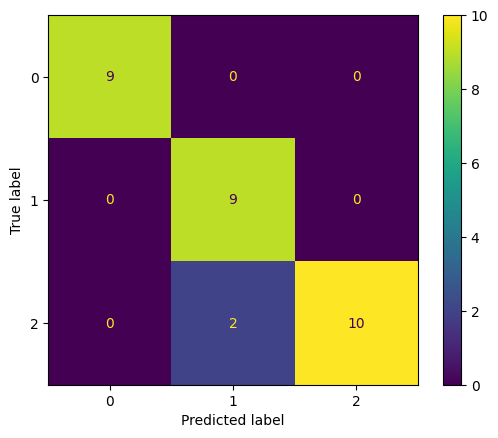

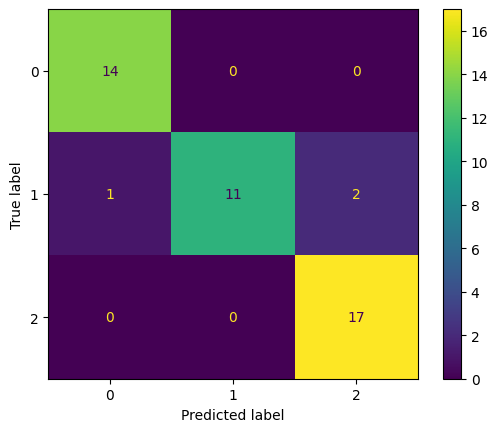

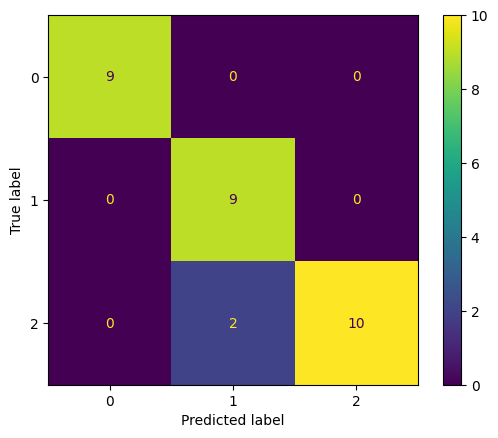

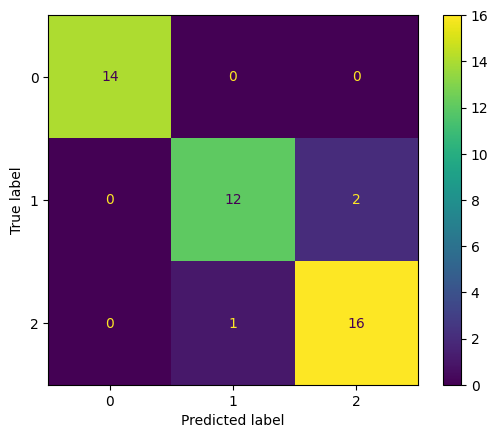

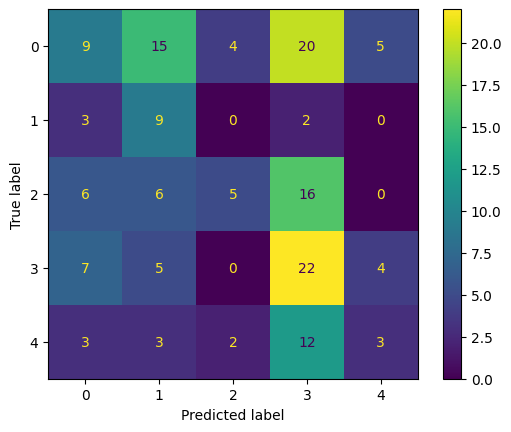

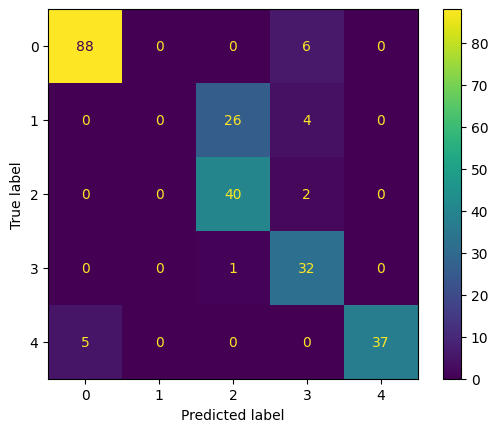

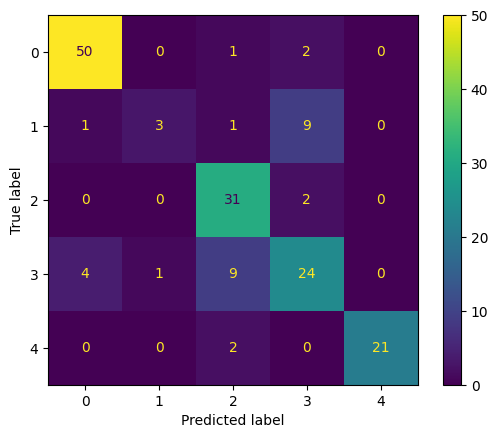

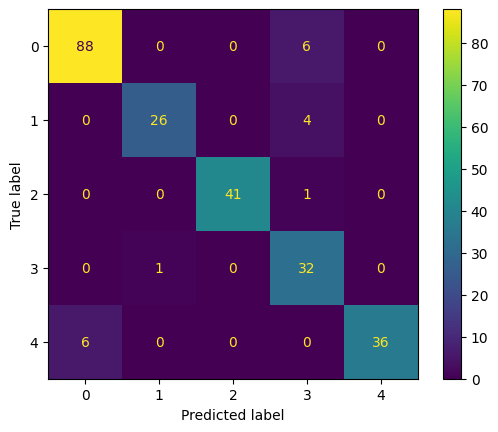

In [73]:
print("TESTE 1: DATASET IRIS")

nb = NaiveBayes()
nb.fit(X_train_iris, y_train_iris)
result1, t1 = nb.predict(X_test_iris, timer=True)

nb = NaiveBayes()
nb.fit(X_train_pca_iris, y_train_pca_iris)
result2, t2 = nb.predict(X_test_pca_iris, timer=True)

print("IMPLEMENTACAO PROPRIA NAIVE BAYES:\nTEMPO PARA RODAR:", t1, "\n",  classification_report(y_test_iris, result1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_iris, result1))
disp.plot()
print("COM PCA:\nTEMPO PARA RODAR:", t2, "\n",  classification_report(y_test_pca_iris, result2))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_pca_iris, result2))
disp.plot()
print("\n\n")

scikitlearnNb = GaussianNB()
scikitlearnNb.fit(X_train_iris, y_train_iris)
t1 = time.perf_counter()
result1 = scikitlearnNb.predict(X_test_iris)
t1 = time.perf_counter() - t1

scikitlearnNb = GaussianNB()
scikitlearnNb.fit(X_train_pca_iris, y_train_pca_iris)
t2 = time.perf_counter()
result2 = scikitlearnNb.predict(X_test_pca_iris)
t2 = time.perf_counter() - t2

print("IMPLEMENTACAO SCIKITLEARN NAIVE BAYES:\nTEMPO PARA RODAR:", t1, "\n",  classification_report(y_test_iris, result1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_iris, result1))
disp.plot()
print("COM PCA:\nTEMPO PARA RODAR:", t2, "\n",  classification_report(y_test_pca_iris, result2))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_pca_iris, result2))
disp.plot()

print("TESTE 2: DATASET ICMR")

nb = NaiveBayes()
nb.fit(X_train_icmr, y_train_icmr)
result1, t1 = nb.predict(X_test_icmr, timer=True)

nb = NaiveBayes()
nb.fit(X_train_pca_icmr, y_train_pca_icmr)
result2, t2 = nb.predict(X_test_pca_icmr, timer=True)

print("IMPLEMENTACAO PROPRIA NAIVE BAYES:\nTEMPO PARA RODAR:", t1, "\n",  classification_report(y_test_icmr, result1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_icmr, result1))
disp.plot()
print("COM PCA:\nTEMPO PARA RODAR:", t2, "\n",  classification_report(y_test_pca_icmr, result2, zero_division=1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_pca_icmr, result2))
disp.plot()
print("\n\n")

scikitlearnNb = GaussianNB()
scikitlearnNb.fit(X_train_icmr, y_train_icmr)
t1 = time.perf_counter()
result1 = scikitlearnNb.predict(X_test_icmr)
t1 = time.perf_counter() - t1

scikitlearnNb = GaussianNB()
scikitlearnNb.fit(X_train_pca_icmr, y_train_pca_icmr)
t2 = time.perf_counter()
result2 = scikitlearnNb.predict(X_test_pca_icmr)
t2 = time.perf_counter() - t2

print("IMPLEMENTACAO SCIKITLEARN KNN:\nTEMPO PARA RODAR:", t1, "\n",  classification_report(y_test_icmr, result1))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_icmr, result1))
disp.plot()
print("COM PCA:\nTEMPO PARA RODAR:", t2, "\n",  classification_report(y_test_pca_icmr, result2))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_pca_icmr, result2))
disp.plot()


Na implementacao propria do naives bayes, em datasets menores como o do iris, a taxa de precisa dele é menor que o do sklearn, mas com pca, ele consegue atingir uma taxa de precisao equivalente ao do sklearn, mas em datasets maiores como o do icmr a precisao dele sem pca é bem baixa, e com o pca consegue melhorar consideravelmente, mas ainda no caso do COAD por exemplo, a sua precisao diminuiu consideravelmente após o pca, na implementacao sklearn, nos dois casos teve alta taxa de precisao, mas a diferenca do pca não foi tao alta quanto na implementacao propria, de qualquer forma, sua precisão foi bem melhor no dataset icmr

### CONCLUSÃO


No caso do knn, o PCA é necessário para que a implementação própria consiga uma precisão equivalente ao do sklearn, enquanto este, consegue alta precisão mesmo sem pca, ou seja, a implementacao própria com PCA com 2 features consegue ser igual ao Knn do scikit learn sem ou com PCA com 2 features.

No caso do naives bayes, no dataset iris, ele manteve uma precisao decente sem PCA e boa com o PCA, já no dataset icmr, a precisão sem PCA foi muito baixa, mas com PCA aumentou a precisão para maioria das classes, menos uma delas, que sem o PCA ainda era um pouco melhor, na implementacao do scikit learn, com ou sem PCA, manteve alta precisão

A implementacao do scikit learn possui muitas outras formas de melhorar sua performance que as implementacoes feitas aqui não possuem, então, a precisão entre as duas podem ser drasticas quando não faz nenhum controle nos dados sendo dadas para as funcoes.

Em relacao ao tempo para rodar o algoritmo, no knn, as duas implementacoes tem quase a mesma velocidade, nas duas diferentes datasets com ou sem pca. No naives bayes, a propria implementacao sem pca demorou quase o dobro de tempo em relacao ao do scikit learn, mas com pca ficou equivalente. Sobre os algoritmos em si, o knn é em geral mais devagar que o naive bayes, já que ele deve calcular a distancia euclideana de todos os pontos.